In [29]:
# Using the data of births in the USA from 1994 to 2003, I'm interested in exploring the following questions:
# 1. In which days (of the month) most and less people were born?
# 2. In which month most and less people were born?
# 3. Is the number of people being born increasing over the years?
# 4. How many people share a birthday (day/month) with me?

# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [97]:
# Read the data table from Github

df = pd.read_html("https://github.com/fivethirtyeight/data/blob/master/births/US_births_1994-2003_CDC_NCHS.csv")

df = df[0]
df.head()

,Unnamed: 0,year,month,date_of_month,day_of_week,births
0,NaN,1994,1,1,6,8096
1,NaN,1994,1,2,7,7772
2,NaN,1994,1,3,1,10142
3,NaN,1994,1,4,2,11248
4,NaN,1994,1,5,3,11053


In [98]:
# Drop the first column Unnamed

df = df.drop("Unnamed: 0", axis = 1)
df.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [99]:
# Check a dataframe summary and types of data stored in each column

df.describe()

# It seems they are all stored as integers, so no changes are necessary

,year,month,date_of_month,day_of_week,births
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,1998.499726,6.523549,15.727820,3.999726,10876.817360
std,2.872293,3.449005,8.800529,2.000753,1858.566631
min,1994.000000,1.000000,1.000000,1.000000,6443.000000
25%,1996.000000,4.000000,8.000000,2.000000,8844.500000
50%,1998.500000,7.000000,16.000000,4.000000,11615.000000
75%,2001.000000,10.000000,23.000000,6.000000,12274.250000
max,2003.000000,12.000000,31.000000,7.000000,14540.000000


In [131]:
# 1. In which days (of the month) most and less people were born?

# Group the data by date of month

births_dates = df.groupby("date_of_month")
births_dates.describe()

print(births_dates['births'].sum())

print(max(births_dates['births'].sum()))

print(min(births_dates['births'].sum()))




date_of_month
1     1276557
2     1288739
3     1304499
4     1288154
5     1299953
6     1304474
7     1310459
8     1312297
9     1303292
10    1320764
11    1314361
12    1318437
13    1277684
14    1320153
15    1319171
16    1315192
17    1324953
18    1326855
19    1318727
20    1324821
21    1322897
22    1317381
23    1293290
24    1288083
25    1272116
26    1284796
27    1294395
28    1307685
29    1223161
30    1202095
31     746696
Name: births, dtype: int64
1326855
746696


Text(0.5,0,'Date of month')

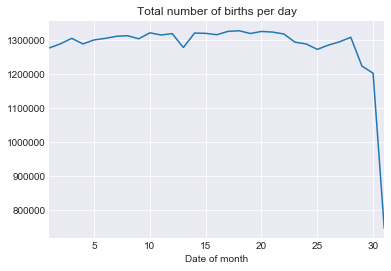

In [117]:
# Plot a histogram with total number of births per day of month

sns.set_style("darkgrid")
births_dates['births'].sum().plot()
plt.title("Total number of births per day")
plt.xlabel("Date of month")

# It is expected that the number of births is more of less equally distributed over the days of month,
# with the expection of the 31st, that is only present in 7 months of the year.
# It is interesting that a "negative anomaly" is present on the 13th, considered by many as a "bad luck day";
# According to the CDC website, in 2015 32% of deliveries were by cesarean [1], and the high incidence of
# cesareans could play an important role for parents to avoid the 13th day of the months.

# Day of month most people are born: 18th
# Day of month less people are born: 31st
# Anomaly: decrease in births on the 13th

# [1] https://www.cdc.gov/nchs/fastats/delivery.htm)

Text(0.5,0,'Month')

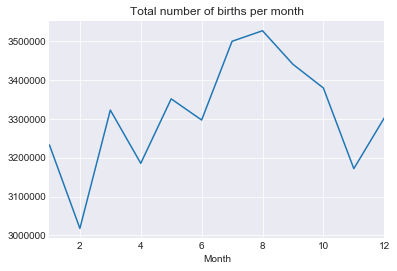

In [136]:
# 2. In which month most and less people were born?

# Group data by months
births_months = df.groupby("month")
births_months.describe()

# Plot a histogram with total number of births per month

sns.set_style("darkgrid")
births_months['births'].sum().plot()
plt.title("Total number of births per month")
plt.xlabel("Month")

# The peak in number of births is in August, followed by July and September;
# This is not surprising considering it is 8 or 9 months after winter holidays (Thanksgiving, Christmas, NYE)!

# Month in which most people were born: August
# Month in which less people were born: February

Text(0.5,0,'Year')

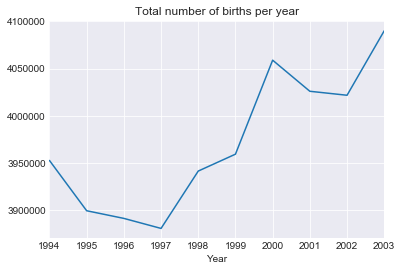

In [132]:
# 3. Is the number of people being born increasing over the years?

# Count the number of births per year

bpy = df.groupby("year")
bpy.describe()

# Plot the total number of births per year

sns.set_style("darkgrid")
bpy['births'].sum().plot()
plt.title("Total number of births per year")
plt.xlabel("Year")

# It seems the total number of births is increasing over the years.
# There is an interesting low in 1997, and a peak in 2000.
# The increase in births from 1997 to 2000 agrees with the decrease in the unemployment rate in the US,
# which reached the lowest rate in 2000 [2]

# The number of people being born is increasing over the years.

# [2] https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/

In [144]:
# 4. How many people share a birthday (day/month) with me?

# Count the number of births on the 17th September

my_bday = df[(df.month == 9) & (df.date_of_month == 17)]
my_bday["births"].sum()

# I share my birthday with 118932 people born in the US over the period studied
# What about you?

118932